In [62]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/credit_customers.csv", encoding='unicode_escape')



In [64]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [65]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [66]:
#Categorize


object_columns = df.select_dtypes(include=['object'])
df[object_columns.columns] = object_columns.astype('category')



In [67]:
#Summary Statistics for Categorical Variables

#test_df['x'].value_counts()
#df.describe(include='category')


df.select_dtypes(include=['category']).describe()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


Text(0.5, 0, 'Checking Account Amount')

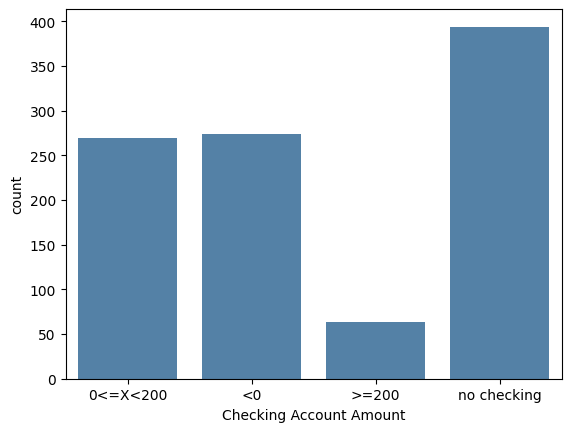

In [68]:
# Create a count plot using Seaborn
#plt.figure(figsize=(20, 6))
sns.countplot(x='checking_status', data=df, color='steelblue')
#plt.title('Critical Mineral Deposits Per Country')
plt.xlabel('Checking Account Amount')
#plt.ylabel('Count')

Text(0.5, 0, 'Purpose of Credit Request')

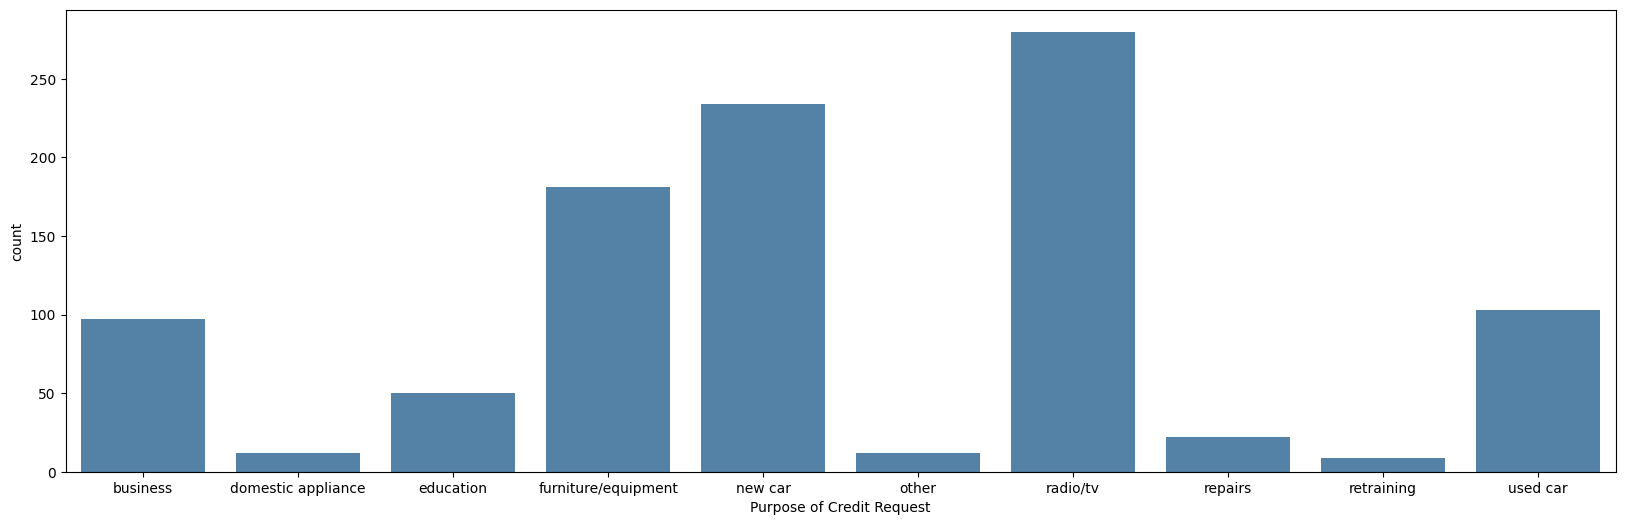

In [69]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=df, color='steelblue')
plt.xlabel('Purpose of Credit Request')

Text(0.5, 0, 'Years Customer Employed')

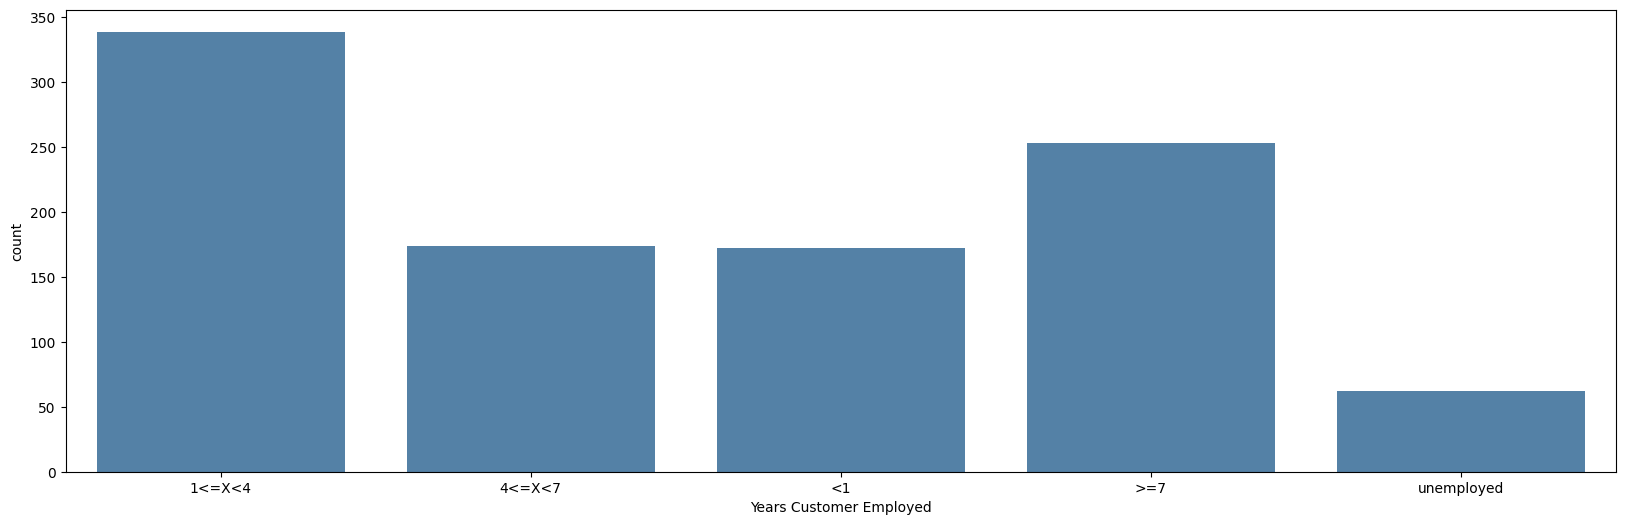

In [70]:
plt.figure(figsize=(20, 6))
sns.countplot(x='employment', data=df, color='steelblue')
plt.xlabel('Years Customer Employed')

Text(0.5, 0, 'Credit History')

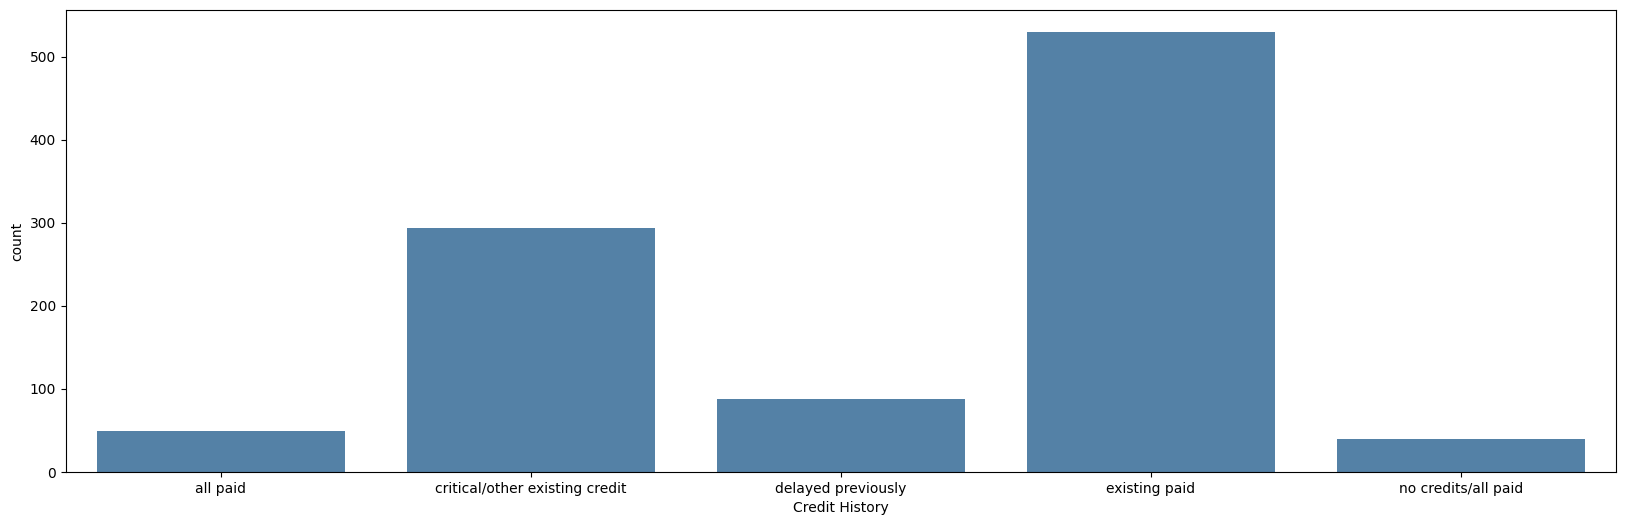

In [71]:
plt.figure(figsize=(20, 6))
sns.countplot(x='credit_history', data=df, color='steelblue')
plt.xlabel('Credit History')

In [72]:
#Check to see if data contains NA's
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [73]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, multiplier=3):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    # Create a boolean mask to filter out rows based on the condition
    mask = ((df >= lower_bound) & (df <= upper_bound)).all(axis=1)
    df_cleaned = df[mask]
    return df_cleaned

# Apply the function to remove outliers from numerical variables
numerical_columns = df.select_dtypes(include=['number'])
df_cleaned = remove_outliers_iqr(numerical_columns, multiplier=3)

# Replace original numerical columns with cleaned columns
df[df_cleaned.columns] = df_cleaned


In [74]:
#Summary Statistics for Numerical Variables 
df.drop(df.select_dtypes(['category']), axis=1).describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.0
mean,20.457421,2959.939173,3.020681,2.822384,34.869830,1.385645,1.0
std,11.205859,2273.274290,1.106205,1.112474,11.652347,0.557040,0.0
min,5.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.0
25%,12.000000,1339.750000,2.000000,2.000000,26.000000,1.000000,1.0
50%,18.000000,2222.000000,3.000000,3.000000,31.000000,1.000000,1.0
75%,24.000000,3773.500000,4.000000,4.000000,40.750000,2.000000,1.0
max,60.000000,11760.000000,4.000000,4.000000,75.000000,4.000000,1.0


In [75]:
#Check to see if data contains NA's
df.isna().sum()

checking_status             0
duration                  178
credit_history              0
purpose                     0
credit_amount             178
savings_status              0
employment                  0
installment_commitment    178
personal_status             0
other_parties               0
residence_since           178
property_magnitude          0
age                       178
other_payment_plans         0
housing                     0
existing_credits          178
job                         0
num_dependents            178
own_telephone               0
foreign_worker              0
class                       0
dtype: int64

In [76]:
df = df.dropna()


In [77]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Text(0.5, 0, 'Duration of Credit Payment (Months)')

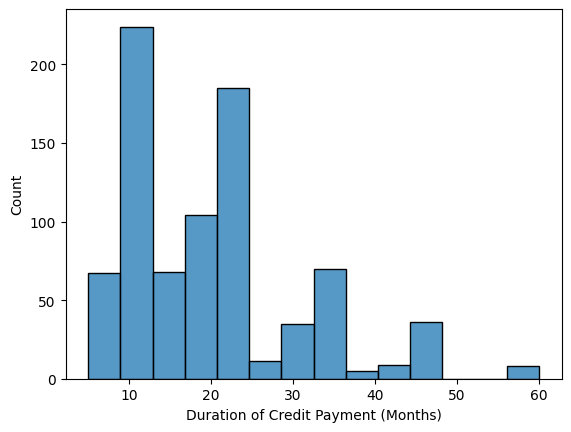

In [78]:
#Select Plot for Numerical values

#sns.histplot(x = x, binwidth = 0.5)
#sns.set_style("whitegrid")
#sns.despine(top=True, right=True, left=True, bottom=True)
sns.histplot(data=df, x="duration", binwidth= 4)
plt.xlabel('Duration of Credit Payment (Months)')

Text(0.5, 0, 'Credit Amount')

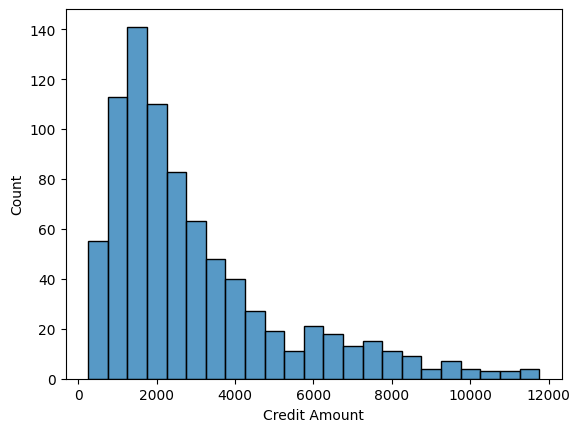

In [79]:
sns.histplot(data=df, x="credit_amount", binwidth= 500)
plt.xlabel('Credit Amount')

Text(0.5, 0, 'Age of Customer')

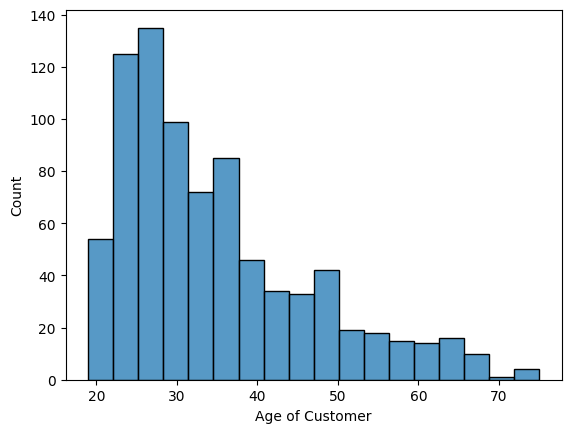

In [80]:
sns.histplot(data=df, x="age")
plt.xlabel('Age of Customer')

In [83]:
#Split Data into Test and Training Set 

train_df, test_df = train_test_split(df, test_size=0.2)

In [84]:
train_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
407,<0,15.0,existing paid,radio/tv,1053.0,<100,<1,4.0,male mar/wid,none,...,real estate,27.0,none,own,1.0,skilled,1.0,none,no,good
882,0<=X<200,30.0,critical/other existing credit,new car,2181.0,no known savings,>=7,4.0,male single,none,...,real estate,36.0,none,own,2.0,skilled,1.0,none,yes,good
152,>=200,36.0,existing paid,radio/tv,5848.0,<100,1<=X<4,4.0,male single,none,...,car,24.0,none,own,1.0,skilled,1.0,none,yes,good
438,<0,42.0,critical/other existing credit,repairs,3394.0,<100,unemployed,4.0,male single,co applicant,...,car,65.0,none,own,2.0,unemp/unskilled non res,1.0,none,yes,good
401,0<=X<200,18.0,critical/other existing credit,business,1887.0,no known savings,1<=X<4,4.0,male mar/wid,none,...,real estate,28.0,bank,own,2.0,skilled,1.0,none,yes,good


In [85]:
#Encoding Categorical Values
label_encoder = preprocessing.LabelEncoder()


encoded_checking_status = label_encoder.fit_transform(train_df['checking_status'])
encoded_checking_credit_history = label_encoder.fit_transform(train_df['credit_history'])   
encoded_checking_purpose = label_encoder.fit_transform(train_df['purpose'])   
encoded_checking_savings_status = label_encoder.fit_transform(train_df['savings_status'])   
encoded_checking_employment = label_encoder.fit_transform(train_df['employment'])   
encoded_checking_personal_status = label_encoder.fit_transform(train_df['personal_status'])   
encoded_checking_other_parties = label_encoder.fit_transform(train_df['other_parties'])   
encoded_checking_property_magnitude = label_encoder.fit_transform(train_df['property_magnitude'])   
encoded_checking_other_payment_plans = label_encoder.fit_transform(train_df['other_payment_plans'])   
encoded_checking_housing = label_encoder.fit_transform(train_df['housing'])   
encoded_checking_job = label_encoder.fit_transform(train_df['job'])   
encoded_checking_own_telephone = label_encoder.fit_transform(train_df['own_telephone'])   
encoded_checking_foreign_worker = label_encoder.fit_transform(train_df['foreign_worker']) 

In [86]:
#Logistic Model on Train Set
train_features = pd.DataFrame([encoded_checking_status,
                              encoded_checking_credit_history,
                              encoded_checking_purpose,
                              encoded_checking_savings_status,
                              encoded_checking_employment,
                              encoded_checking_personal_status,
                              encoded_checking_other_parties, 
                              encoded_checking_property_magnitude,
                              encoded_checking_other_payment_plans,
                              encoded_checking_housing,
                              encoded_checking_job,
                              encoded_checking_own_telephone,
                              encoded_checking_foreign_worker,
                              train_df["duration"],
                              train_df["credit_amount"],
                              train_df["installment_commitment"],
                              train_df["residence_since"],
                              train_df["age"],
                              train_df["existing_credits"],
							  train_df["num_dependents"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = train_df["class"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)


[0.0008895]
[[ 5.11189338e-01 -1.23167468e-01  1.17071324e-01  1.49918175e-01
   8.27430046e-02  2.28430901e-01  4.46698308e-02  9.73722883e-02
   2.10160935e-02 -7.63778633e-02  1.50958372e-02  1.04411114e-01
  -3.26077532e-02 -3.50799343e-02 -5.37583127e-05 -2.71057885e-01
   4.15579743e-02  1.66873272e-02 -1.90454659e-02  8.35921284e-04]]


In [87]:
#Encode Test Features 
encoded_checking_status = label_encoder.fit_transform(test_df['checking_status'])
encoded_checking_credit_history = label_encoder.fit_transform(test_df['credit_history'])   
encoded_checking_purpose = label_encoder.fit_transform(test_df['purpose'])   
encoded_checking_savings_status = label_encoder.fit_transform(test_df['savings_status'])   
encoded_checking_employment = label_encoder.fit_transform(test_df['employment'])   
encoded_checking_personal_status = label_encoder.fit_transform(test_df['personal_status'])   
encoded_checking_other_parties = label_encoder.fit_transform(test_df['other_parties'])   
encoded_checking_property_magnitude = label_encoder.fit_transform(test_df['property_magnitude'])   
encoded_checking_other_payment_plans = label_encoder.fit_transform(test_df['other_payment_plans'])   
encoded_checking_housing = label_encoder.fit_transform(test_df['housing'])   
encoded_checking_job = label_encoder.fit_transform(test_df['job'])   
encoded_checking_own_telephone = label_encoder.fit_transform(test_df['own_telephone'])   
encoded_checking_foreign_worker = label_encoder.fit_transform(test_df['foreign_worker']) 

In [88]:
#Make Predictions on Test Data 

test_features = pd.DataFrame([encoded_checking_status,
                              encoded_checking_credit_history,
                              encoded_checking_purpose,
                              encoded_checking_savings_status,
                              encoded_checking_employment,
                              encoded_checking_personal_status,
                              encoded_checking_other_parties, 
                              encoded_checking_property_magnitude,
                              encoded_checking_other_payment_plans,
                              encoded_checking_housing,
                              encoded_checking_job,
                              encoded_checking_own_telephone,
                              encoded_checking_foreign_worker,
                              test_df["duration"],
                              test_df["credit_amount"],
                              test_df["installment_commitment"],
                              test_df["residence_since"],
                              test_df["age"],
                              test_df["existing_credits"],
							  test_df["num_dependents"]]).T

test_preds = log_model.predict(X=test_features)

In [94]:
#Compare predictions to actual values using numpy

np.mean(test_preds == test_df['class'])

0.7272727272727273

In [95]:
#Compare predictions to actual values using sklearn

from sklearn.metrics import accuracy_score
accuracy_score(test_preds, test_df['class'])

0.7272727272727273